In [1]:

# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, KFold
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")


ModuleNotFoundError: No module named 'imblearn'

https://towardsdatascience.com/machine-learning-model-for-predicting-click-through-in-hotel-online-ranking-d55fc18c8516
https://www.kaggle.com/konchada/logistic-vs-random-forest-model-for-ad-click
https://becominghuman.ai/predicting-click-probabilities-on-a-leading-advertising-platform-7582633e6e78
https://towardsdatascience.com/mobile-ads-click-through-rate-ctr-prediction-44fdac40c6ff

In [2]:
item_data=pd.read_csv("item_data.csv")
train = pd.read_csv("train.csv")
view_log = pd.read_csv("view_log.csv")
test=pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [236]:
item_data.shape,


((132761, 6),)

In [237]:
train.shape,


((237609, 7),)

In [238]:
view_log.shape


(3118622, 5)

In [239]:
test.shape,


((90675, 6),)

In [12]:
sample_submission.shape

(90675, 2)

In [13]:
item_data.head()

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239


In [137]:
train.head()

,impression_id,user_id,app_code,os_version,is_4G,is_click,impression_time_Timestamp,Month,Day,Hour,Weekday,intermediate,latest,old,ad_pri,ad_click
0,c4ca4238a0b923820dcc509a6f75849b,87862,422,old,0,0,2018-11-15 00:00:00,11,15,0,3,0,0,1,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,63410,467,latest,1,1,2018-11-15 00:01:00,11,15,0,3,0,1,0,0,0
2,70efdf2ec9b086079795c442636b55fb,71748,259,intermediate,1,0,2018-11-15 00:02:00,11,15,0,3,1,0,0,0,0
3,8e296a067a37563370ded05f5a3bf3ec,69209,244,latest,1,0,2018-11-15 00:02:00,11,15,0,3,0,1,0,1,1
4,182be0c5cdcd5072bb1864cdee4d3d6e,62873,473,latest,0,0,2018-11-15 00:02:00,11,15,0,3,0,1,0,0,0


In [134]:
train = train.drop(['ad_count','app_code1','click_sum','app_code2'], axis=1)

In [15]:
view_log.head()

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640
2,2018-10-15 08:58:00,android,573960,23628,128855
3,2018-10-15 08:58:00,android,121691,2430,12774
4,2018-10-15 08:58:00,android,218564,19227,28296


In [16]:
test.head()

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,1
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,latest,1
4,bf5a572cca75f5fc67f4b14e58b11d70,2018-12-13 07:48:00,35431,242,latest,1


In [17]:
sample_submission.head()

,impression_id,is_click
0,a9e7126a585a69a32bc7414e9d0c0ada,0
1,caac14a5bf2ba283db7708bb34855760,0
2,13f10ba306a19ce7bec2f3cae507b698,0
3,39c4b4dc0e9701b55a0a4f072008fb3f,0
4,bf5a572cca75f5fc67f4b14e58b11d70,0


In [3]:
log_item_merge =pd.merge(view_log,item_data,on='item_id',how ='left' )

In [4]:
log_item_merge.head()

,server_time,device_type,session_id,user_id,item_id,item_price,category_1,category_2,category_3,product_type
0,2018-10-15 08:58:00,android,112333,4557,32970,54685.0,16.0,56.0,253.0,3184.0
1,2018-10-15 08:58:00,android,503590,74788,7640,1376.0,7.0,71.0,228.0,545.0
2,2018-10-15 08:58:00,android,573960,23628,128855,4544.0,4.0,38.0,62.0,5609.0
3,2018-10-15 08:58:00,android,121691,2430,12774,904.0,17.0,39.0,252.0,2740.0
4,2018-10-15 08:58:00,android,218564,19227,28296,2304.0,12.0,57.0,54.0,7422.0


In [68]:
#High no of ad's(app_code) count given to app priorities by (High, Medium, low)

#app_ad_cnt=train.groupby(['app_code'])['is_click'].count()#.nlargest().reset_index()
#app_ad_cnt=train.groupby('app_code').agg({"is_click": "count"}).reset_index(drop=False)
#app_ad_cnt=train.groupby(['app_code'], as_index=True)[['is_click']].count()
#app_ad_cnt= train.loc[:,['app_code','is_click']]
#app_ad_cnt['ad_count']=train.groupby(['app_code'])['is_click'].count()

app_ad_cnt=train.groupby('app_code').agg({"is_click": "count"})
app_ad_cnt.rename(columns={"is_click":"ad_count"},inplace=True)

app_ad_cnt['app_code']=app_ad_cnt.index

In [115]:
app_ad_cnt.rename(columns={"app_code":"app_code1"},inplace=True)

In [76]:
min(app_ad_cnt['ad_count']),max(app_ad_cnt['ad_count']),np.mean(app_ad_cnt['ad_count'])

(1, 33788, 484.91632653061225)

In [100]:
app_ad_cnt['ad_pri'] = np.where( (app_ad_cnt['ad_count'] > 2000), 1, 0)

In [101]:
app_ad_cnt['ad_pri'].value_counts()

0    464
1     26
Name: ad_pri, dtype: int64

In [116]:
app_ad_cnt.head()

,ad_count,app_code1,ad_pri
app_code,,,
0,73,0,0
1,35,1,0
2,134,2,0
3,8860,3,1
4,2,4,0


In [103]:
app_ad_cli=train.groupby('app_code').agg({"is_click": "sum"})
app_ad_cli.rename(columns={"is_click":"click_sum"},inplace=True)
app_ad_cli['app_code']=app_ad_cli.index

In [117]:
app_ad_cli.rename(columns={"app_code":"app_code2"},inplace=True)

In [111]:
app_ad_cli['ad_click'] = np.where( (app_ad_cli['click_sum'] > 100), 1, 0)

In [118]:
app_ad_cli.head()

,click_sum,app_code2,ad_click
app_code,,,
0,6,0,0
1,3,1,0
2,9,2,0
3,305,3,1
4,0,4,0


In [104]:
train.groupby(['app_code'])['is_click'].count().nlargest(5).reset_index()

,app_code,is_click
0,207,33788
1,386,30706
2,190,17441
3,127,10851
4,371,9343


In [119]:
train1=train

In [120]:
train2=train

In [130]:
train =pd.merge(train1,app_ad_cnt,left_on="app_code", right_on="app_code1",how ='left' )


In [132]:
train =pd.merge(train,app_ad_cli,left_on="app_code", right_on="app_code2",how ='left' )


In [ ]:
train = train.drop(['ad_count','app_code1','click_sum','app_code2'], axis=1)

In [143]:
test.head()

,impression_id,user_id,app_code,os_version,is_4G,impression_time_Timestamp,Month,Day,Hour,Weekday,is_click,intermediate,latest,old,ad_pri,ad_click
0,a9e7126a585a69a32bc7414e9d0c0ada,44754,127,latest,1,2018-12-13 07:44:00,12,13,7,3,0,0,1,0,1.0,1.0
1,caac14a5bf2ba283db7708bb34855760,29656,44,latest,0,2018-12-13 07:45:00,12,13,7,3,0,0,1,0,1.0,0.0
2,13f10ba306a19ce7bec2f3cae507b698,25234,296,latest,1,2018-12-13 07:46:00,12,13,7,3,0,0,1,0,1.0,1.0
3,39c4b4dc0e9701b55a0a4f072008fb3f,22988,207,latest,1,2018-12-13 07:47:00,12,13,7,3,0,0,1,0,1.0,1.0
4,bf5a572cca75f5fc67f4b14e58b11d70,35431,242,latest,1,2018-12-13 07:48:00,12,13,7,3,0,0,1,0,1.0,1.0


In [139]:
test =pd.merge(test,app_ad_cnt,left_on="app_code", right_on="app_code1",how ='left' )


In [140]:
test =pd.merge(test,app_ad_cli,left_on="app_code", right_on="app_code2",how ='left' )

In [142]:
test = test.drop(['ad_count','app_code1','click_sum','app_code2'], axis=1)

In [135]:
print(pd.crosstab(train['ad_pri'],train['is_click']))

is_click       0     1
ad_pri                
0          41400  2660
1         185347  8202


In [136]:
print(pd.crosstab(train['ad_click'],train['is_click']))

is_click       0     1
ad_click              
0          49602  2580
1         177145  8282


In [67]:
view_log['device_type'].value_counts()

android    3117737
iphone         861
web             24
Name: device_type, dtype: int64

In [68]:
train['os_version'].value_counts()

latest          129216
intermediate     55543
old              52850
Name: os_version, dtype: int64

In [110]:
train['is_click'].value_counts()

0    226747
1     10862
Name: is_click, dtype: int64

In [70]:
print(pd.crosstab(train['is_4G'],train['is_click']))

is_click       0     1
is_4G                 
0         144738  7020
1          82009  3842


In [125]:
userclick1=train.groupby('user_id')['is_click'].sum()#>'0'

In [161]:
train.groupby('user_id')['is_click'].sum().nlargest(5)

user_id
784      15
54611    15
84559    15
8121     14
79033    13
Name: is_click, dtype: int64

In [172]:
train.groupby('user_id')['is_click'].count().nlargest(5)

user_id
71457    73
29947    70
59007    70
52082    67
68540    64
Name: is_click, dtype: int64

In [56]:
userclick1=train.groupby('user_id').agg({"is_click": "count"})

In [57]:
userclick1.rename(columns={"is_click":"is_click_count"},inplace=True)

In [63]:
userclick1['user_id']=userclick1.index

In [64]:
userclick1[userclick1['is_click_count']==73]

,is_click_count,user_id
user_id,,
71457,73,71457


In [193]:
userclick2.rename(columns={"is_click":"is_click_sum"},inplace=True)

In [194]:
userclick2[userclick2['is_click_sum']>=10]

,is_click_sum
user_id,
784,15
3364,10
8121,14
35126,11
37747,10
52485,11
52737,10
54611,15
55183,12


In [192]:
userclick1[userclick1['is_click_count']>=70]

,is_click_count
user_id,
29947,70
59007,70
71457,73


In [189]:
train.query('user_id==68540 and is_click ==1').count()

impression_id                9
user_id                      9
app_code                     9
os_version                   9
is_4G                        9
is_click                     9
impression_time_Timestamp    9
Month                        9
Day                          9
Hour                         9
Weekday                      9
dtype: int64

In [72]:
print(pd.crosstab(train['app_code'],train['is_click'])).size().nlargest(5)

is_click     0    1
app_code           
0           67    6
1           32    3
2          125    9
3         8555  305
4            2    0
5         5006  396
6            1    0
7          726   45
8           27    5
9          675   46
12           2    0
13           1    0
14          80   17
15           2    0
16         103   13
17          59    2
19          22    2
20          26    2
21           1    0
22          10    2
23           6    0
24          28    0
25           8    0
26           1    0
27          17    1
28           1    1
29          44    8
30           5    0
31         106    3
32        5718  266
...        ...  ...
489         68    2
491        421   16
492         79    6
493         17    5
495        167    6
496         90    1
497          1    0
498         19    0
499         62    3
500         20    1
502          1    0
503         73    5
504        279   47
505        145    4
506          9    0
507        399   14
508       1686  132


AttributeError: 'NoneType' object has no attribute 'size'

In [73]:
print(pd.crosstab(train['os_version'],train['is_click']))


is_click           0     1
os_version                
intermediate   52668  2875
latest        123834  5382
old            50245  2605


In [26]:
#Analysing user base train recored
view_log.query('user_id==87862')

,server_time,device_type,session_id,user_id,item_id
221309,2018-10-19 18:11:00,android,190710,87862,43886


In [27]:
item_data.query('item_id==43886')

,item_id,item_price,category_1,category_2,category_3,product_type
115593,43886,2350,11,35,20,5622


In [28]:
train.query('user_id ==87862')

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
616,621bf66ddb7c962aa0d22ac97d69b793,2018-11-15 00:19:00,87862,422,old,0,0
5936,ab394288aed46588bdc90bf4b541ec0d,2018-11-16 17:29:00,87862,422,old,0,0


In [30]:

view_log.query('user_id==63410')

,server_time,device_type,session_id,user_id,item_id
284024,2018-10-21 06:13:00,android,356854,63410,43209
284028,2018-10-21 06:13:00,android,356854,63410,66370
309046,2018-10-21 17:01:00,android,345289,63410,43209
339224,2018-10-22 09:54:00,android,406658,63410,43209
449354,2018-10-24 11:14:00,android,15568,63410,71877
486317,2018-10-25 05:00:00,android,343558,63410,43209
486325,2018-10-25 05:03:00,android,343558,63410,43209
2115995,2018-11-24 05:29:00,android,983607,63410,97274
3028698,2018-12-10 19:48:00,android,135003,63410,109074
3028895,2018-12-10 19:51:00,android,135003,63410,58018


In [39]:
item_data.query('item_id==43209 or item_id==66370 or item_id ==71877 or item_id ==97274 or item_id ==109074 or item_id ==58018 or item_id ==22064')

,item_id,item_price,category_1,category_2,category_3,product_type
52,109074,6330,10,63,295,9337
10689,71877,3961,10,63,295,2270
50221,22064,1024,11,76,67,8411
55749,58018,1888,13,52,163,2734
60403,43209,3421,4,74,292,577
96448,97274,2630,10,43,223,3055
117273,66370,14166,4,74,292,3399


In [47]:
item_data.query('product_type == 386')

,item_id,item_price,category_1,category_2,category_3,product_type
88047,25430,300,15,0,214,386


In [48]:
train.query('app_code ==386').head(10)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
8,fc490ca45c00b1249bbe3554a4fdf6fb,2018-11-15 00:05:00,83318,386,old,0,0
47,70c639df5e30bdee440e4cdf599fec2b,2018-11-15 00:34:00,14496,386,latest,0,0
85,5f0f5e5f33945135b874349cfbed4fb9,2018-11-15 01:23:00,75369,386,intermediate,1,0
109,9232fe81225bcaef853ae32870a2b0fe,2018-11-15 02:19:00,45894,386,latest,0,0
116,31b3b31a1c2f8a370206f111127c0dbd,2018-11-15 02:37:00,29344,386,intermediate,0,0
122,d8700cbd38cc9f30cecb34f0c195b137,2018-11-15 03:00:00,27949,386,latest,0,0
168,eae27d77ca20db309e056e3d2dcd7d69,2018-11-15 00:15:00,80712,386,latest,0,0
169,979d472a84804b9f647bc185a877a8b5,2018-11-15 00:16:00,73469,386,latest,0,0
187,9be40cee5b0eee1462c82c6964087ff9,2018-11-15 00:31:00,1246,386,intermediate,0,0
194,e0c641195b27425bb056ac56f8953d24,2018-11-15 00:38:00,88249,386,old,1,0


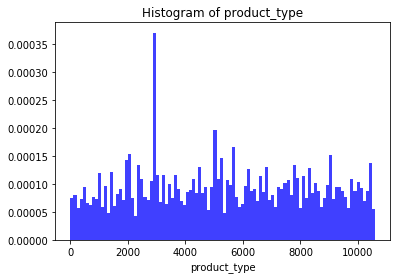

In [41]:
n, bins, patches = plt.hist(item_data.product_type, 100, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('product_type')
plt.title('Histogram of product_type')
plt.show();

In [44]:
item_data.groupby('product_type').size().nlargest(5)

product_type
2874     4261
5622     1417
5036     1262
10412     990
7791      980
dtype: int64

In [45]:
train.groupby('app_code').size().nlargest(5)

app_code
207    33788
386    30706
190    17441
127    10851
371     9343
dtype: int64

In [78]:
train.groupby('is_click')['is_4G'].describe()

,count,mean,std,min,25%,50%,75%,max
is_click,,,,,,,,
0,226747.0,0.361676,0.480487,0.0,0.0,0.0,1.0,1.0
1,10862.0,0.353710,0.478143,0.0,0.0,0.0,1.0,1.0


In [74]:
train['app_code'].nunique()

490

In [75]:
test['app_code'].nunique()

373

In [76]:
item_data['product_type'].nunique()

7959

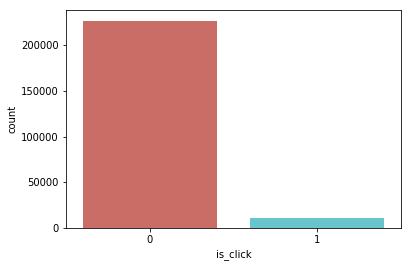

0    226747
1     10862
Name: is_click, dtype: int64

In [66]:
sns.countplot(x='is_click',data=train, palette='hls')
plt.show();
train['is_click'].value_counts()

In [80]:
train.impression_time.describe()

count                  237609
unique                  36461
top       2018-12-04 00:01:00
freq                       46
Name: impression_time, dtype: object

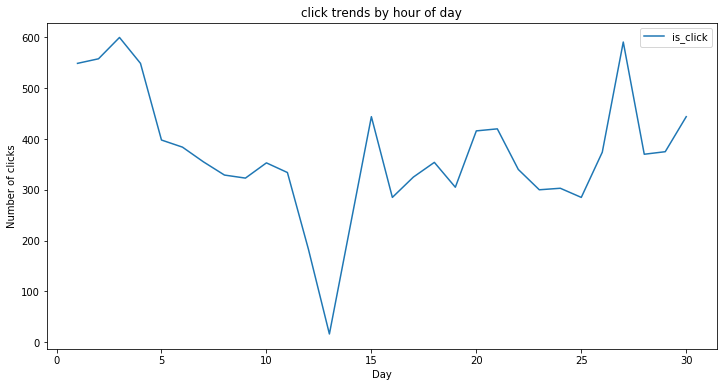

In [88]:
train.groupby('Day').agg({'is_click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day');

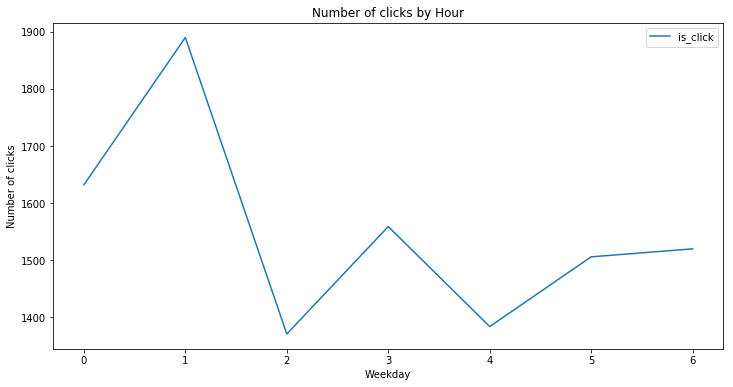

In [91]:
train.groupby('Weekday').agg({'is_click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by Hour');

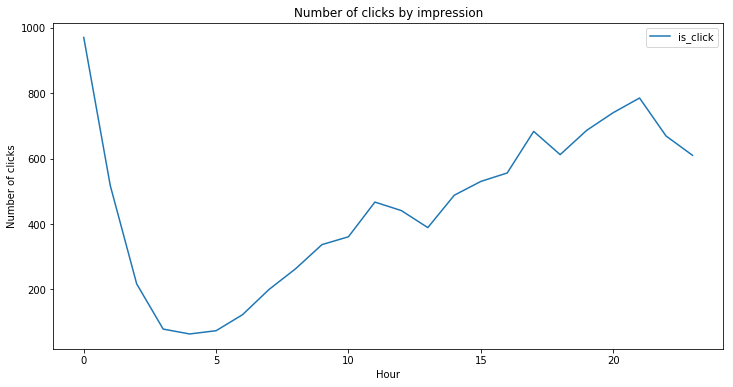

In [87]:
train.groupby('Hour').agg({'is_click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by Hour');

In [5]:
# Extract datetime variables using timestamp column
train['impression_time_Timestamp'] = pd.to_datetime(train['impression_time']) 
# Converting timestamp column into datatime object in order to extract new features
train['Month'] = train['impression_time_Timestamp'].dt.month 
# Creates a new column called Month
train['Day'] = train['impression_time_Timestamp'].dt.day     
# Creates a new column called Day
train['Hour'] = train['impression_time_Timestamp'].dt.hour   
# Creates a new column called Hour
train["Weekday"] = train['impression_time_Timestamp'].dt.dayofweek 
# Creates a new column called Weekday with sunday as 6 and monday as 0
# Other way to create a weekday column
#df['weekday'] = df['Timestamp'].apply(lambda x: x.weekday()) # Monday 0 .. sunday 6
# Dropping timestamp column to avoid redundancy
train = train.drop(['impression_time'], axis=1) # deleting timestamp

In [6]:
# Extract datetime variables using timestamp column
test['impression_time_Timestamp'] = pd.to_datetime(test['impression_time']) 
# Converting timestamp column into datatime object in order to extract new features
test['Month'] = test['impression_time_Timestamp'].dt.month 
# Creates a new column called Month
test['Day'] = test['impression_time_Timestamp'].dt.day     
# Creates a new column called Day
test['Hour'] = test['impression_time_Timestamp'].dt.hour   
# Creates a new column called Hour
test["Weekday"] = test['impression_time_Timestamp'].dt.dayofweek 
# Creates a new column called Weekday with sunday as 6 and monday as 0
# Other way to create a weekday column
#df['weekday'] = df['Timestamp'].apply(lambda x: x.weekday()) # Monday 0 .. sunday 6
# Dropping timestamp column to avoid redundancy
test = test.drop(['impression_time'], axis=1) # deleting timestamp

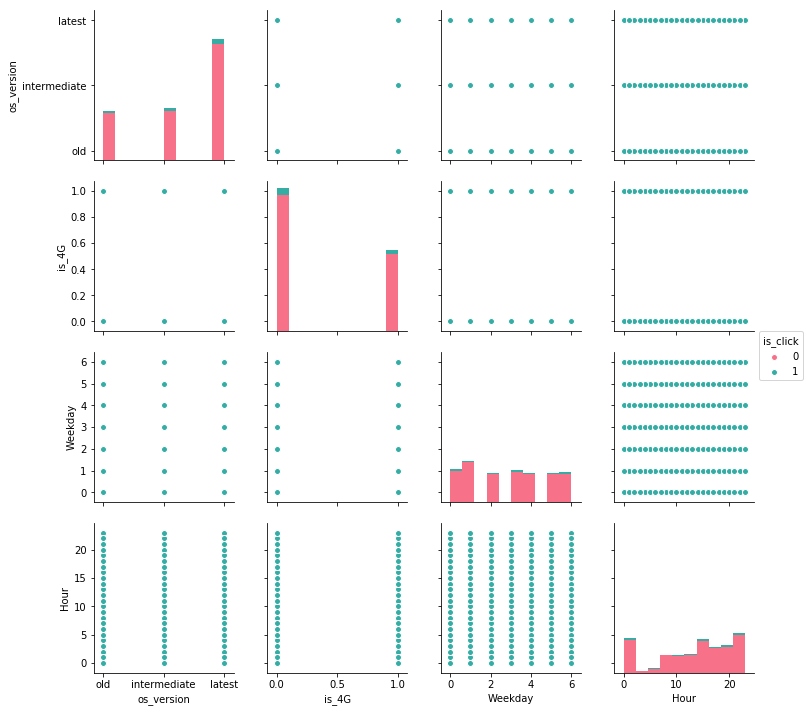

In [89]:
# Creating a pairplot with hue defined by Clicked on Ad column
sns.pairplot(train, hue = 'is_click', vars = ['os_version', 'is_4G', 'Weekday', 'Hour'], palette = 'husl')

In [313]:
test['is_click'] = '0'
df = train.append(test, ignore_index=True)
print(df.shape)

(328284, 11)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [145]:
test['is_click'] = 0

In [146]:
test.head()

,impression_id,user_id,app_code,os_version,is_4G,impression_time_Timestamp,Month,Day,Hour,Weekday,is_click,intermediate,latest,old,ad_pri,ad_click
0,a9e7126a585a69a32bc7414e9d0c0ada,44754,127,latest,1,2018-12-13 07:44:00,12,13,7,3,0,0,1,0,1.0,1.0
1,caac14a5bf2ba283db7708bb34855760,29656,44,latest,0,2018-12-13 07:45:00,12,13,7,3,0,0,1,0,1.0,0.0
2,13f10ba306a19ce7bec2f3cae507b698,25234,296,latest,1,2018-12-13 07:46:00,12,13,7,3,0,0,1,0,1.0,1.0
3,39c4b4dc0e9701b55a0a4f072008fb3f,22988,207,latest,1,2018-12-13 07:47:00,12,13,7,3,0,0,1,0,1.0,1.0
4,bf5a572cca75f5fc67f4b14e58b11d70,35431,242,latest,1,2018-12-13 07:48:00,12,13,7,3,0,0,1,0,1.0,1.0


In [168]:
test['ad_pri']=test['ad_pri'].astype(int)

In [169]:
test['ad_click']=test['ad_click'].astype(int)

In [166]:
test['ad_pri'].isnull().sum()

0

In [164]:
test['ad_pri'].fillna(0, inplace=True)

In [165]:
test['ad_click'].fillna(0, inplace=True)

In [167]:
test['ad_click'].isnull().sum()

0

In [315]:
df[df['is_click']=='NA'].head()

,Day,Hour,Month,Weekday,app_code,impression_id,impression_time_Timestamp,is_4G,is_click,os_version,user_id


In [8]:
# One hot encoding for categorical variables
temp = pd.get_dummies(train['os_version'])
train = train.join(temp)
print(train.shape)

temp = pd.get_dummies(test['os_version'])
test = test.join(temp)
print(test.shape)


(237609, 14)
(90675, 14)


In [317]:
# Droping loan_id, dates & other categorical variables 
df1 = df.drop(['impression_id','impression_time_Timestamp','os_version','user_id'],axis=1)

In [306]:
df1.head()

,Day,Hour,Month,Weekday,app_code,is_4G,is_click,intermediate,latest,old
0,15,0,11,3,422,0,0,0,0,1
1,15,0,11,3,467,1,1,0,1,0
2,15,0,11,3,259,1,0,1,0,0
3,15,0,11,3,244,1,0,0,1,0
4,15,0,11,3,473,0,0,0,1,0


In [318]:
cols=['Day', 'Hour', 'Month', 'Weekday', 'app_code', 'is_4G','intermediate', 'is_click','latest', 'old']

In [287]:
train.head()

,impression_id,user_id,app_code,os_version,is_4G,is_click,impression_time_Timestamp,Month,Day,Hour,Weekday
0,c4ca4238a0b923820dcc509a6f75849b,87862,422,old,0,0,2018-11-15 00:00:00,11,15,0,3
1,45c48cce2e2d7fbdea1afc51c7c6ad26,63410,467,latest,1,1,2018-11-15 00:01:00,11,15,0,3
2,70efdf2ec9b086079795c442636b55fb,71748,259,intermediate,1,0,2018-11-15 00:02:00,11,15,0,3
3,8e296a067a37563370ded05f5a3bf3ec,69209,244,latest,1,0,2018-11-15 00:02:00,11,15,0,3
4,182be0c5cdcd5072bb1864cdee4d3d6e,62873,473,latest,0,0,2018-11-15 00:02:00,11,15,0,3


In [319]:
train = df1.iloc[:237609,:][cols]
test = df1.iloc[237609:,:][cols]

In [9]:
train.shape,test.shape

((237609, 14), (90675, 14))

In [147]:
numerical_features = train.select_dtypes(include=np.number)
categorical_features = train.select_dtypes(include=np.object)
print("numeric_features: ", numerical_features.shape, numerical_features.columns)
print("categorical_features: ", categorical_features.shape, categorical_features.columns)

numeric_features:  (237609, 13) Index(['user_id', 'app_code', 'is_4G', 'is_click', 'Month', 'Day', 'Hour',
       'Weekday', 'intermediate', 'latest', 'old', 'ad_pri', 'ad_click'],
      dtype='object')
categorical_features:  (237609, 2) Index(['impression_id', 'os_version'], dtype='object')


In [148]:
X=train.drop(columns=['impression_id','impression_time_Timestamp','os_version','user_id','is_click'],axis=0)
y=train.is_click

In [149]:
def simple_model(alg):

    # splitting data into training and validation set
    xtrain, xtest, ytrain, ytest = train_test_split(X,y, random_state=42, test_size=0.2)
    model = alg
    model.fit(xtrain, ytrain) # training the model
#     prediction = model.predict_proba(xtest) # predicting on the validation set
#     prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
#     prediction_int = prediction_int.astype(np.int)

    print("f1_score:",f1_score(ytest, model.predict(xtest))) # calculating f1 score
    #print("AUC:",(ytest, model.predict(xtest))) # calculating f1 score
    print("Accuracy on train data:",model.score(xtrain,ytrain))
    print("Accuracy on test data:",model.score(xtest,ytest))

In [150]:
algs = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),ExtraTreesClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
algs_lst = ['LR','DTC','RFC','ETC','ABC','GBC']
for alg,l in zip(algs,algs_lst):
    print(l)
    simple_model(alg=alg)

LR


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1_score: 0.0
Accuracy on train data: 0.9541052255020069
Accuracy on test data: 0.9550103110138463
DTC
f1_score: 0.08335868573167021
Accuracy on train data: 0.9690457527342743
Accuracy on test data: 0.9365977862884559
RFC
f1_score: 0.05386250885896526
Accuracy on train data: 0.9658787818209557
Accuracy on test data: 0.9438154959808089
ETC
f1_score: 0.059909439219784054
Accuracy on train data: 0.9690457527342743
Accuracy on test data: 0.9432052523041959
ABC


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1_score: 0.0
Accuracy on train data: 0.9541052255020069
Accuracy on test data: 0.9550103110138463
GBC


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1_score: 0.0
Accuracy on train data: 0.9541104862510325
Accuracy on test data: 0.9550103110138463


In [191]:
# Confusion Matrix (on AdaBoostClassifier)
from sklearn.metrics import confusion_matrix
xtrain, xtest, ytrain, ytest = train_test_split(X,y, random_state=42, test_size=0.2)
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
confusion_matrix = confusion_matrix(ytest,ypred)
print(confusion_matrix)

[[44765   619]
 [ 2053    85]]


In [192]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97     45384
          1       0.12      0.04      0.06      2138

avg / total       0.92      0.94      0.93     47522



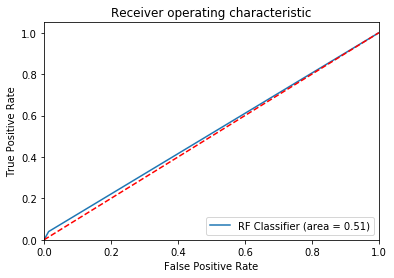

In [193]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(ytest, ypred)
fpr, tpr, thresholds = roc_curve(ytest, ypred)
plt.figure()
plt.plot(fpr, tpr, label='RF Classifier (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [154]:
model = RandomForestClassifier(random_state=10)
model.fit(X, y)
ypred = model.predict(xtest)

In [155]:
train_pred=model.predict(train.drop(columns=['impression_id','impression_time_Timestamp','os_version','user_id','is_click'],axis=0))

In [170]:
test_pred=model.predict(test.drop(columns=['impression_id','impression_time_Timestamp','os_version','user_id','is_click'],axis=0))

In [172]:
sample_submission1=sample_submission

In [173]:
sample_submission1["is_click"]=test_pred.astype(int)

In [174]:
sample_submission1['is_click'].value_counts()

0    90108
1      567
Name: is_click, dtype: int64

In [175]:
sample_submission1.to_csv("sample_submissionlg1.csv",index=False)

In [449]:

# using gridsearch & cross validation, hypertune best parameters of Logistic Regression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
xtrain, xtest, ytrain, ytest = train_test_split(X,y, random_state=42, test_size=0.2)
print(xtrain.shape)
model = LogisticRegression()
grid = {'C':[0.001,0.01,0.1,1,5,10],
       'penalty':['l1','l2'],
        'class_weight':['balanced']}
# cv = KFold(n_splits = 10, shuffle=True, random_state = 7)
clf = GridSearchCV(model, grid, n_jobs=8, cv=None,scoring='f1_macro')
clf.fit(xtrain, ytrain)

(190087, 9)


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10], 'penalty': ['l1', 'l2'], 'class_weight': ['balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=0)

In [450]:
clf.best_score_, clf.best_params_

(0.39331771463041715, {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1'})

In [176]:
model = LogisticRegression(C= 0.1, class_weight= 'balanced', penalty= 'l1')
model.fit(xtrain, ytrain)
# ypred = model.predict(xtest)
prediction = model.predict_proba(xtest) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.56 # if prediction is greater than or equal to 0.3 than 1 else 0
ypred = prediction_int.astype(np.int)

print("f1_score:",f1_score(ytest, ypred)) # calculating f1 score
print("Accuracy on train data:",model.score(xtrain,ytrain))
print("Accuracy on test data:",model.score(xtest,ytest))

f1_score: 0.0835525297849296
Accuracy on train data: 0.5260380773014461
Accuracy on test data: 0.5277134800723875


In [177]:
pd.crosstab(ypred,ytest)

is_click,0,1
row_0,,
0,41329,1868
1,4055,270


In [179]:
print(classification_report(ytest,ypred))

             precision    recall  f1-score   support

          0       0.96      0.91      0.93     45384
          1       0.06      0.13      0.08      2138

avg / total       0.92      0.88      0.89     47522



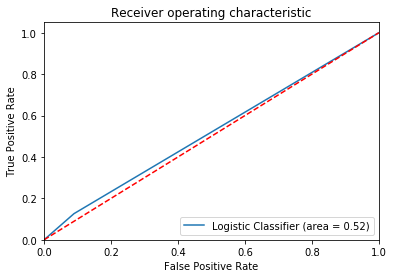

In [180]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(ytest, ypred)
fpr, tpr, thresholds = roc_curve(ytest, ypred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Classifier (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

In [181]:
model = LogisticRegression(C= 0.2, class_weight= 'balanced', penalty= 'l1')
model.fit(X, y)
ypred = model.predict(xtest)

In [182]:
train_pred=model.predict(train.drop(columns=['impression_id','impression_time_Timestamp','os_version','user_id','is_click'],axis=0))

In [184]:
test_pred=model.predict(test.drop(columns=['impression_id','impression_time_Timestamp','os_version','user_id','is_click'],axis=0))

In [186]:
sample_submission1["is_click"]=test_pred.astype(int)

In [185]:
sample_submission1=sample_submission

In [187]:
sample_submission1['is_click'].value_counts()

0    52708
1    37967
Name: is_click, dtype: int64

In [188]:
sample_submission1.to_csv("sample_submissionlg3.csv",index=False)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.2)
model = RandomForestClassifier()
grid = {'n_estimators': [10,20,30,50,100],
        #'learning_rate':[0.4,0.5,0.6,0.7],
        'max_features' : ['auto', 'sqrt'],
        'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
        'min_samples_split' : [2, 5, 10],
        'min_samples_leaf' : [1, 2, 4],
        'bootstrap' : [True, False],
        
       }
#         'learning_rate' : [0.5,0.52,0.54,0.56,0.58,0.6,0.62,0.64,0.66,0.68,0.7]}
# cv = KFold(n_splits = 10, shuffle=True, random_state = 7)
clf = GridSearchCV(model, grid, n_jobs=8, cv=None,scoring='f1_macro',verbose=2)
clf.fit(xtrain, ytrain)

Fitting 3 folds for each of 1980 candidates, totalling 5940 fits


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  2.3min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:  5.3min


In [463]:

clf.best_score_, clf.best_params_

(0.48825683133663805, {'learning_rate': 0.4, 'n_estimators': 10})

In [464]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for m,s,p in zip(means,stds,params):
    print(m,s,p)

0.48825683133663805 8.941877859154185e-08 {'learning_rate': 0.4, 'n_estimators': 10}
0.48825683133663805 8.941877859154185e-08 {'learning_rate': 0.4, 'n_estimators': 20}
0.48825683133663805 8.941877859154185e-08 {'learning_rate': 0.4, 'n_estimators': 30}
0.48825683133663805 8.941877859154185e-08 {'learning_rate': 0.4, 'n_estimators': 50}
0.48825683133663805 8.941877859154185e-08 {'learning_rate': 0.4, 'n_estimators': 100}
0.48825683133663805 8.941877859154185e-08 {'learning_rate': 0.5, 'n_estimators': 10}
0.48825683133663805 8.941877859154185e-08 {'learning_rate': 0.5, 'n_estimators': 20}
0.48825683133663805 8.941877859154185e-08 {'learning_rate': 0.5, 'n_estimators': 30}
0.48825683133663805 8.941877859154185e-08 {'learning_rate': 0.5, 'n_estimators': 50}
0.48825683133663805 8.941877859154185e-08 {'learning_rate': 0.5, 'n_estimators': 100}
0.48825683133663805 8.941877859154185e-08 {'learning_rate': 0.6, 'n_estimators': 10}
0.48825683133663805 8.941877859154185e-08 {'learning_rate': 0.6

In [465]:
model = RandomForestClassifier(n_estimators= 0.48, max_features= 10,max_depth=,min_samples_split=,min_samples_leaf=,bootstrap=)
model.fit(xtrain, ytrain)
# ypred = model.predict(xtest)
prediction = model.predict_proba(xtest) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.445 # if prediction is greater than or equal to 0.3 than 1 else 0
ypred = prediction_int.astype(np.int)

print("f1_score:",f1_score(ytest, ypred)) # calculating f1 score
print("Accuracy on train data:",model.score(xtrain,ytrain))
print("Accuracy on test data:",model.score(xtest,ytest))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1_score: 0.0
Accuracy on train data: 0.9541052255020069
Accuracy on test data: 0.9550103110138463


In [466]:

pd.crosstab(ypred,ytest)

is_click,0,1
row_0,,
0,45384,2138


In [467]:
print(classification_report(ytest,ypred))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98     45384
          1       0.00      0.00      0.00      2138

avg / total       0.91      0.96      0.93     47522



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [474]:
model = AdaBoostClassifier(learning_rate= 0.48, n_estimators= 10)
model.fit(X, y)
ypred = model.predict(xtest)

In [475]:
train_pred=model.predict(train.drop(columns=['impression_id','impression_time_Timestamp','os_version','user_id','is_click'],axis=0))

In [476]:
test_pred=model.predict(test.drop(columns=['impression_id','impression_time_Timestamp','os_version','user_id','is_click'],axis=0))

In [477]:
sample_submission1["is_click"]=test_pred.astype(int)

In [478]:
sample_submission1=sample_submission

In [479]:
sample_submission1['is_click'].value_counts()

0    90675
Name: is_click, dtype: int64